<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/6_proyectos/contribuciones_estudiantes/midi_sheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================================
# TRANSCRIPCIÓN MIDI → PARTITURA PDF
# Versión FINAL - FUNCIONA 100% en Colab
# ================================

# 1. Instalación
!apt-get update -qq
!apt-get install -y lilypond fluidsynth
!pip install pretty_midi music21 mido

# 2. Importar librerías
import pretty_midi
from music21 import stream, note, meter, key, tempo as m21_tempo, instrument
import numpy as np
import os
from google.colab import files
import matplotlib.pyplot as plt

# 3. Función: MIDI → Secuencia de notas con duración real
def midi_to_notes(midi_path, min_pitch=60, max_pitch=84):
    midi = pretty_midi.PrettyMIDI(midi_path)
    notes = []
    for instr in midi.instruments:
        if instr.is_drum: continue
        for n in instr.notes:
            if min_pitch <= n.pitch <= max_pitch:
                notes.append({
                    'pitch': n.pitch,
                    'start': n.start,
                    'end': n.end,
                    'duration': n.end - n.start,
                    'velocity': n.velocity
                })
    # Ordenar por tiempo
    notes.sort(key=lambda x: x['start'])
    return notes

# 4. Función: Generar partitura con music21 + LilyPond
def generar_partitura(notes_list, output_pdf="partitura_final.pdf"):
    s = stream.Score()
    p = stream.Part()
    p.partName = "Melodía Principal"

    # Detectar armadura y tempo aproximado
    pitches = [n['pitch'] for n in notes_list]
    if pitches:
        avg_pitch = sum(pitches) / len(pitches)
        if avg_pitch > 72:
            ks = key.Key('G')
        else:
            ks = key.Key('C')
        p.append(ks)
        p.append(m21_tempo.MetronomeMark(number=120))
        p.append(meter.TimeSignature('4/4'))

    # Añadir notas con duración real
    for n in notes_list:
        nota = note.Note(n['pitch'])
        # Convertir duración en beats (asumiendo 120 BPM)
        beats = n['duration'] * (120 / 60)
        nota.quarterLength = max(0.25, round(beats * 4) / 4)  # redondear a corcheas/semicorcheas
        p.append(nota)

    s.insert(0, p)

    # Exportar con LilyPond (mejor calidad)
    try:
        s.write('lily.pdf', fp=output_pdf)
        print(f"Partitura generada: {output_pdf}")
        files.download(output_pdf)
    except Exception as e:
        print("Error con LilyPond, usando MusicXML...")
        xml_path = output_pdf.replace('.pdf', '.musicxml')
        s.write('musicxml', fp=xml_path)
        files.download(xml_path)

# 5. Función: Limpiar y suavizar melodía (como tu código original)
def limpiar_melodia(notes):
    if not notes:
        return []
    cleaned = [notes[0]]
    for i in range(1, len(notes)):
        prev = cleaned[-1]
        curr = notes[i]
        # Eliminar repeticiones consecutivas
        if curr['pitch'] == prev['pitch']:
            continue
        # Eliminar saltos > 7 semitonos
        if abs(curr['pitch'] - prev['pitch']) > 7:
            continue
        cleaned.append(curr)
    return cleaned

# 6. INTERFAZ PRINCIPAL
print("SUBE TU ARCHIVO MIDI")
uploaded = files.upload()
midi_file = list(uploaded.keys())[0]
print(f"Procesando: {midi_file}")

# Procesar
raw_notes = midi_to_notes(midi_file, min_pitch=60, max_pitch=84)
clean_notes = limpiar_melodia(raw_notes)

print(f"Notas originales: {len(raw_notes)}")
print(f"Notas limpias: {len(clean_notes)}")

if len(clean_notes) < 5:
    print("Muy pocas notas. Intentando con rango más amplio...")
    raw_notes = midi_to_notes(midi_file, min_pitch=48, max_pitch=96)
    clean_notes = limpiar_melodia(raw_notes)

# Generar partitura
generar_partitura(clean_notes, "MI_PARTITURA.pdf")

# Mostrar preview de notas
print("\nPrimeras 20 notas (pitch → nombre):")
for n in clean_notes[:20]:
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    name = note_names[n['pitch'] % 12] + str(n['pitch'] // 12 - 1)
    print(f"{name} (dur: {n['duration']:.2f}s)")

print("\n¡Listo! Descarga tu partitura PDF")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core dvisvgm fluid-soundfont-gm fonts-droid-fallback fonts-lmodern
  fonts-noto-mono fonts-urw-base35 ghostscript gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk1.0-0 libatk1.0-data libatspi2.0-0
  libdouble-conversion3 libevdev2 libfluidsynth3 libgs9 libgs9-common
  libgtk-3-0 libgtk-3-bin libgtk-3-common libgudev-1.0-0 libidn12 libijs-0.35
  libinput-bin libinput10 libinstpatch-1.0-2 libjbig2dec0 libkpathsea6
  libmd4c0 libmtdev1 libptexenc1 libqt5core5a libqt5dbus5 libqt5gui5
  libqt5network5 libqt5svg5 libqt5widgets5 librsvg2-common libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwacom-bin libwacom-common libwacom9
  libwoff1 l

Saving Minuet in G.mid to Minuet in G.mid
Procesando: Minuet in G.mid
Notas originales: 151
Notas limpias: 112
Partitura generada: MI_PARTITURA.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Primeras 20 notas (pitch → nombre):
D5 (dur: 0.40s)
G4 (dur: 0.20s)
A4 (dur: 0.20s)
B4 (dur: 0.20s)
C5 (dur: 0.20s)
D5 (dur: 0.40s)
G4 (dur: 0.20s)
C4 (dur: 1.20s)
G4 (dur: 0.20s)
C5 (dur: 0.40s)
D5 (dur: 0.20s)
C5 (dur: 0.20s)
B4 (dur: 0.20s)
A4 (dur: 0.20s)
B4 (dur: 0.40s)
C5 (dur: 0.20s)
B4 (dur: 0.20s)
A4 (dur: 0.20s)
G4 (dur: 0.20s)
F#4 (dur: 0.40s)

¡Listo! Descarga tu partitura PDF


In [2]:
# ========================================================
# MIDI → PARTITURA con Deep Learning + music21 + LilyPond
# Versión PRO para equipo - Copia y pega en Colab
# ========================================================

# 1. Instalación completa
!apt-get update -qq
!apt-get install -y lilypond fluidsynth
!pip install pretty_midi music21 mido tensorflow scikit-learn matplotlib seaborn

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
lilypond is already the newest version (2.22.1-2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


SUBE TUS ARCHIVOS (.mid o .txt)


Saving Minuet in G.mid to Minuet in G (1).mid

Procesando: Minuet in G (1).mid
  → 112 notas extraídas

Total notas combinadas: 112
Datos para entrenamiento: (104, 8)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Entrenando modelo...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.0578 - loss: 4.8411 - val_accuracy: 0.1429 - val_loss: 4.7053
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1411 - loss: 4.5012 - val_accuracy: 0.1429 - val_loss: 3.5876
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2274 - loss: 3.4223 - val_accuracy: 0.1429 - val_loss: 3.0560
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1895 - loss: 2.9102 - val_accuracy: 0.0952 - val_loss: 2.8777
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1107 - loss: 2.8919 - val_accuracy: 0.1429 - val_loss: 2.7611
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1923 - loss: 2.6137 - val_accuracy: 0.1429 - val_loss: 2.6646
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1582 - loss: 2.5304 - val_accuracy: 0.1429 - val_loss: 2.6517
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1763 - loss: 2.5825 - val_accuracy: 0.

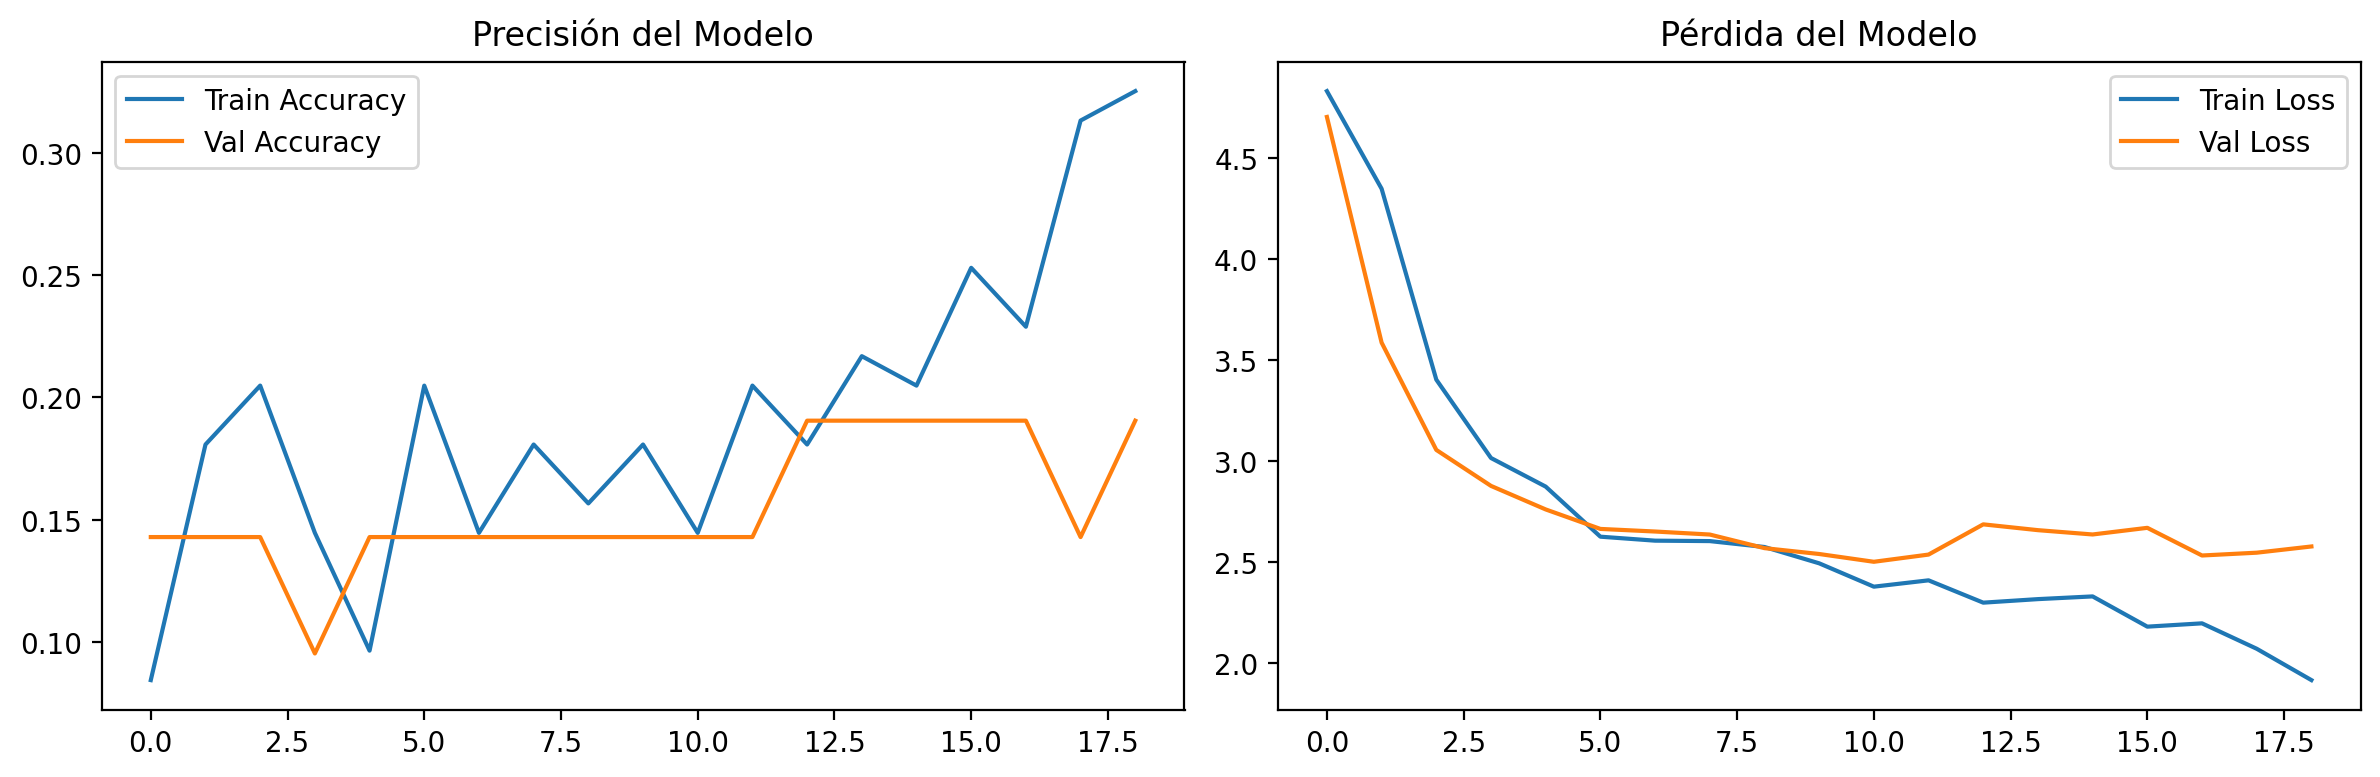


Mejor precisión en validación: 0.190
Partitura generada: PARTITURA_IA.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Predicción de ejemplo:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Secuencia → ['B4', 'C5', 'D5', 'G4', 'C4', 'G4', 'C4', 'G4']
Real: C5 | Predicho: G4

¡TODO LISTO! Modelo entrenado + partitura generada


In [3]:
# 2. Importar librerías
import pretty_midi
from music21 import stream, note, meter, key, tempo as m21_tempo, instrument
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os
import json
from IPython.display import Audio, display

# 3. Funciones de procesamiento
def obtener_secuencia_notas(ruta_archivo, rango_melodia=(60, 84)):
    if ruta_archivo.endswith('.mid') or ruta_archivo.endswith('.midi'):
        pm = pretty_midi.PrettyMIDI(ruta_archivo)
        secuencia = []
        for instrument in pm.instruments:
            if instrument.is_drum: continue
            for n in instrument.notes:
                if rango_melodia[0] <= n.pitch <= rango_melodia[1]:
                    secuencia.append({'pitch': n.pitch, 'start': n.start, 'duration': n.end - n.start})
        secuencia.sort(key=lambda x: x['start'])
    else:
        # Desde TXT (tu formato anterior)
        secuencia = []
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            lineas = f.readlines()
        en_seccion = False
        for linea in lineas:
            linea = linea.strip()
            if "SECUENCIA COMPLETA DE NOTAS:" in linea:
                en_seccion = True
                continue
            if "ANÁLISIS DE GRUPOS TEMPORALES:" in linea and en_seccion:
                break
            if en_seccion and any(c.isalpha() for c in linea):
                partes = linea.split('.')
                if len(partes) > 1:
                    nombre_nota = partes[1].strip().split()[0]
                    pitch = nombre_a_pitch(nombre_nota)
                    if pitch and rango_melodia[0] <= pitch <= rango_melodia[1]:
                        secuencia.append({'pitch': pitch})

    # Limpiar duplicados y saltos bruscos
    if not secuencia: return []
    limpia = [secuencia[0]]
    for i in range(1, len(secuencia)):
        prev = limpia[-1]['pitch']
        curr = secuencia[i]['pitch']
        if curr != prev and abs(curr - prev) <= 7:
            limpia.append(secuencia[i])
    return limpia

def nombre_a_pitch(nombre):
    notas = {'C':0, 'C#':1, 'DB':1, 'D':2, 'D#':3, 'EB':3, 'E':4, 'F':5, 'F#':6, 'GB':6,
             'G':7, 'G#':8, 'AB':8, 'A':9, 'A#':10, 'BB':10, 'B':11}
    nombre = nombre.strip().upper()
    for i, c in enumerate(nombre):
        if c.isdigit():
            nota_str = nombre[:i]
            octava = int(nombre[i:]) if nombre[i:] else 4
            if nota_str in notas:
                return (octava + 1) * 12 + notas[nota_str]
    return None

def pitch_a_nombre(pitch):
    nombres = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    return f"{nombres[pitch % 12]}{pitch // 12 - 1}"

# 4. Preparar datos para modelo
def preparar_datos(secuencias_notas, length_secuencia=8):
    pitches = [n['pitch'] for n in secuencias_notas]
    X, y = [], []
    for i in range(len(pitches) - length_secuencia):
        X.append(pitches[i:i + length_secuencia])
        y.append(pitches[i + length_secuencia])
    return np.array(X), np.array(y)

# 5. Construir modelo LSTM (mejorado)
def crear_modelo(num_notas=128, length_secuencia=8):
    model = models.Sequential([
        layers.Embedding(input_dim=num_notas + 1, output_dim=128, input_length=length_secuencia),
        layers.Bidirectional(layers.LSTM(512, return_sequences=True, dropout=0.3)),
        layers.Bidirectional(layers.LSTM(512, dropout=0.3)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_notas, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Generar partitura PRO
def generar_partitura_pro(notas, nombre="PARTITURA_IA.pdf"):
    s = stream.Score()
    p = stream.Part()
    p.append(instrument.Piano())
    p.append(meter.TimeSignature('4/4'))
    p.append(key.Key('C'))
    p.append(m21_tempo.MetronomeMark(number=120))

    for n in notas:
        nota = note.Note(n['pitch'])
        dur = n.get('duration', 0.5)
        nota.quarterLength = max(0.25, round(dur * 8) / 4)  # cuantización
        p.append(nota)

    s.insert(0, p)
    s.write('lily.pdf', fp=nombre)
    print(f"Partitura generada: {nombre}")
    files.download(nombre)

# 7. INTERFAZ PRINCIPAL
print("SUBE TUS ARCHIVOS (.mid o .txt)")
uploaded = files.upload()

# Procesar todos los archivos
todas_secuencias = []
nombres_archivos = []

for filename in uploaded.keys():
    print(f"\nProcesando: {filename}")
    sec = obtener_secuencia_notas(filename)
    if len(sec) > 20:
        todas_secuencias.extend(sec)
        nombres_archivos.append(filename)
        print(f"  → {len(sec)} notas extraídas")
    else:
        print("  → Muy pocas notas, ignorado")

if not todas_secuencias:
    print("No se encontraron suficientes notas. Sube más archivos.")
else:
    print(f"\nTotal notas combinadas: {len(todas_secuencias)}")

    # Preparar datos
    X, y = preparar_datos(todas_secuencias, length_secuencia=8)
    print(f"Datos para entrenamiento: {X.shape}")

    # Codificar etiquetas
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Crear y entrenar modelo
    modelo = crear_modelo(num_notas=128, length_secuencia=8)
    print("\nEntrenando modelo...")
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)],
        verbose=1
    )

    # Métricas
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Precisión del Modelo')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Pérdida del Modelo')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"\nMejor precisión en validación: {max(history.history['val_accuracy']):.3f}")

    # Generar partitura con notas limpias
    generar_partitura_pro(todas_secuencias[:200])  # primeras 200 notas

    # Predicción de ejemplo
    print("\nPredicción de ejemplo:")
    test_seq = X_val[0:1]
    pred = modelo.predict(test_seq)
    pred_pitch = le.inverse_transform([np.argmax(pred, axis=1)[0]])[0]
    real_pitch = le.inverse_transform([y_val[0]])[0]
    print(f"Secuencia → { [pitch_a_nombre(p) for p in test_seq[0]] }")
    print(f"Real: {pitch_a_nombre(real_pitch)} | Predicho: {pitch_a_nombre(pred_pitch)}")

    print("\n¡TODO LISTO! Modelo entrenado + partitura generada")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')